In [1]:
import requests, bs4
import pandas as pd
from lxml import html
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, unquote
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc
import platform 

# 그래프에서 한글 표기를 위한,
# 글자체 변경(윈도우, 맥os 각각의 경우에 대해서 처리)
if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
else: 
    print('Check your OS system')

In [3]:
law_code = '11110'
date = []
for yy in range(2018, 2021):
    for mm in range(1, 13):
        mm_str = str(mm).zfill(2) #mm을 2자리로 만들기 위해 mm_str로 변경하였음
        yymm = '{}{}'.format(yy, mm_str)
        date.append(yymm)

In [4]:
test = []
test_item=[]

for i in date:
    url_test = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?serviceKey=g0xxCgFIz6KBQflrM3Wa3vTteKN8N525AB7JLLGyRe8b2GIS3luZSAbh3Nhv22JKm8U1TbCJ1qQmUyK5qO5dvQ%3D%3D&LAWD_CD={law_code}&DEAL_YMD={i}'
    resp =  requests.get(url_test).text.encode('utf-8')
    xmlobj = bs4.BeautifulSoup(resp, 'lxml-xml')
    rows = xmlobj.findAll('item')
    test.append(rows)
test = sum(test, [])

for j in range(len(test)):
    parsing = test[j].find_all()
    data = {}
    for k in range(len(parsing)):
        tag = parsing[k].name.strip()
        text = parsing[k].text.strip()
        data[tag] = text
    test_item.append(data)
    
open_value = pd.DataFrame(test_item)

In [5]:
real_value = open_value.drop(['해제사유발생일', '해제여부', '일'], axis = 1)

## 아파트거래일자 파생변수 생성

In [6]:
month = [str(real_value['월'][i]).zfill(2) for i in range(len(real_value))]

In [7]:
real_value['월'] = month
real_value['거래날짜'] = real_value['년'] + real_value['월']

In [8]:
value = real_value[['도로명','아파트', '건축년도', '거래날짜', '층', '거래금액']]

# 건축년도에 따른 거래금액의 변화

In [9]:
apt_money = []
floor = []

for n in range(len(value)):
    new_num = str(value['거래금액'][n]).replace(',', '')
    new_num = int(new_num)
    flo = int(value['층'][n])
    floor.append(flo)
    apt_money.append(new_num)

In [10]:
value['거래금액'] = apt_money

C:\Users\Doffal\AppData\Local\Temp/ipykernel_33308/3268083424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['거래금액'] = apt_money


In [11]:
value['층2'] = floor

C:\Users\Doffal\AppData\Local\Temp/ipykernel_33308/4130268068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['층2'] = floor


In [12]:
value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   도로명     360 non-null    object
 1   아파트     360 non-null    object
 2   건축년도    360 non-null    object
 3   거래날짜    360 non-null    object
 4   층       360 non-null    object
 5   거래금액    360 non-null    int64 
 6   층2      360 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 19.8+ KB


In [13]:
value['건축년도'].unique()

array(['1999', '2008', '2000', '2003', '2004', '2005', '1983', '2006',
       '2007', '1998', '1994', '2017', '1995', '1992', '1981', '2014',
       '2002', '2009', '1997', '1993', '1966', '1996', '2013', '1970',
       '2011', '2020'], dtype=object)

In [14]:
value = value.sort_values(by = '건축년도')

In [15]:
value.reset_index(inplace= True, drop= True)

In [16]:
year_apt = value.groupby('건축년도').거래금액.mean()

In [17]:
year_apt = year_apt.round(2)

In [18]:
label = list(value['건축년도'].unique())

In [19]:
value['건축년도기간']= ''

In [20]:
value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   도로명     360 non-null    object
 1   아파트     360 non-null    object
 2   건축년도    360 non-null    object
 3   거래날짜    360 non-null    object
 4   층       360 non-null    object
 5   거래금액    360 non-null    int64 
 6   층2      360 non-null    int64 
 7   건축년도기간  360 non-null    object
dtypes: int64(2), object(6)
memory usage: 22.6+ KB


In [21]:
year_part = []

for i in range(len(value['건축년도'])):
    yea = int(value['건축년도'][i])
    year_part.append(yea)

In [22]:
value['건축년도'] = year_part

In [23]:
test = []

for year in value['건축년도']:
    if 1966 <= year < 1990:
        test.append('1990년도 이전')
    elif 1991 <= year < 2000:
        test.append("1990년도")
    elif 2000 <= year < 2010:
        test.append("2000년도")
    elif 2010 <= year < 2020:
        test.append("2010년도")
    else:
        test.append("2020년도")

value['건축년도기간'] = test

In [24]:
year_apt2 = value.groupby('건축년도기간').거래금액.mean()
year_apt2 = year_apt2.round(2)

In [25]:
label = value['건축년도기간'].unique()

<BarContainer object of 5 artists>

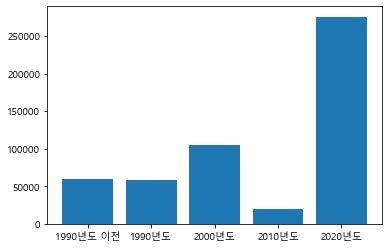

In [26]:
plt.bar(label, year_apt2)
#plt.title('')